In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(train_imgs, train_labels), (test_imgs, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

Training Label:
8
Training Pixel Array:
[[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167 159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0 174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0   0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2   0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2   0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0   4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   

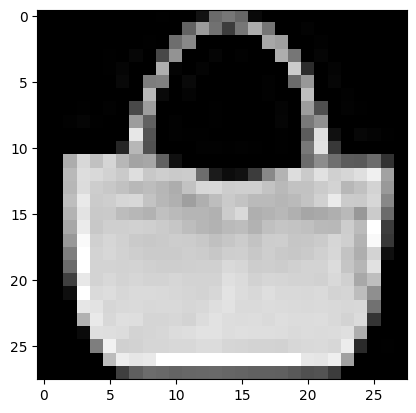

In [ ]:
# index of image - between 0 to 60,000
index = 100

np.set_printoptions(linewidth=320)

print(f"Training Label:\n{train_labels[index]}")
print(f"Training Pixel Array:\n{train_imgs[index]}")

plt.imshow(train_imgs[index], cmap='gray')
plt.show()

**Note**


*   Image has pixel value 0-255 but neural networks work better with Normalizes data.
*   Flatten takes that “square” value (a 2D array) and turns it into a line (a 1D array)

In [ ]:
# Normalizing the image
train_imgs, test_imgs = train_imgs/255.0, test_imgs/255.0

#Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('loss')<0.1:
      print("\nless than 0.1 loss achieved. So cancelling futher training!")
    elif logs.get('accuracy')>0.95:
      print("\n95% accuracy achieved. So cancelling futher training!")
      self.model.stop_training = True

In [ ]:
myCallBack = MyCallBack()

In [ ]:
# Fit
history = model.fit(train_imgs, train_labels, epochs=100, validation_split=0.1, callbacks=[myCallBack])

Epoch 1/100
1688/1688 [==============================] - 15s 7ms/step - loss: 0.4911 - accuracy: 0.8273 - val_loss: 0.3998 - val_accuracy: 0.8523
Epoch 2/100
1688/1688 [==============================] - 13s 7ms/step - loss: 0.3706 - accuracy: 0.8663 - val_loss: 0.3592 - val_accuracy: 0.8698
Epoch 3/100
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3319 - accuracy: 0.8781 - val_loss: 0.3813 - val_accuracy: 0.8623
Epoch 4/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3064 - accuracy: 0.8871 - val_loss: 0.3296 - val_accuracy: 0.8798
Epoch 5/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2872 - accuracy: 0.8946 - val_loss: 0.3504 - val_accuracy: 0.8708
Epoch 6/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2726 - accuracy: 0.8999 - val_loss: 0.3128 - val_accuracy: 0.8828
Epoch 7/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2590 - accuracy: 0.9040 - val_loss: 0.3173 - val_

[]

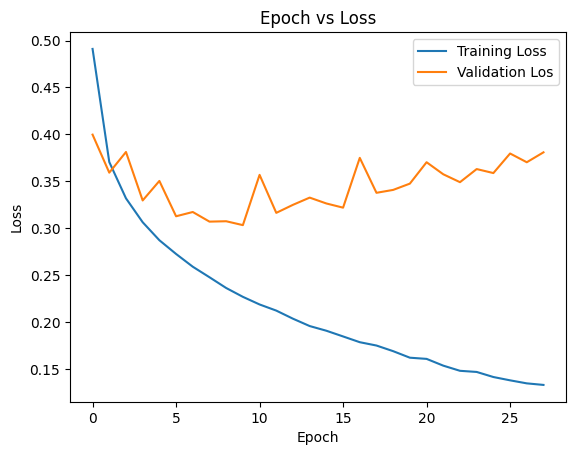

In [ ]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label = 'Validation Los')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.legend()
plt.plot()

[]

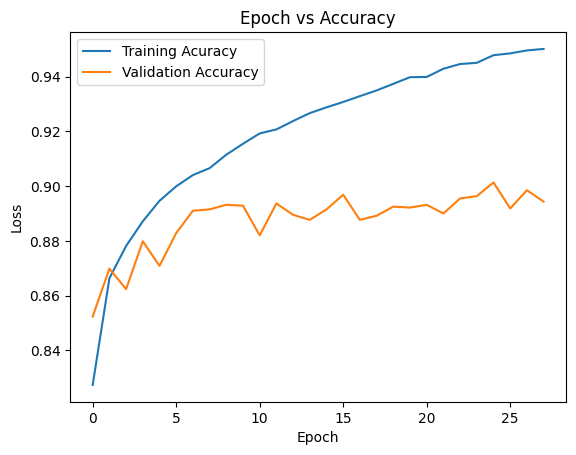

In [ ]:
plt.plot(history.history['accuracy'], label="Training Acuracy")
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Accuracy")
plt.legend()
plt.plot()

In [ ]:
model.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3975 - accuracy: 0.8933


[0.39748480916023254, 0.8932999968528748]